In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.12
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [2]:
cache_dir = './tmp'
dataset_file_name = 'shakespeare.txt'
dataset_file_origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'

dataset_file_path = tf.keras.utils.get_file(
    fname=dataset_file_name,
    origin=dataset_file_origin,
    cache_dir=pathlib.Path(cache_dir).absolute()
)

print(dataset_file_path)

1115394/1115394 [==============================] - 0s 0us/step
/tmp/.keras/datasets/shakespeare.txt


In [3]:
text = open(dataset_file_path, mode='r').read()

print('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [4]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [5]:
vocab = sorted(set(text))

print('{} unique characters'.format(len(vocab)))
print('vocab:', vocab)

65 unique characters
vocab: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
char2index = {char: index for index, char in enumerate(vocab)}

print('{')
for char, _ in zip(char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [7]:
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [8]:
text_as_int = np.array([char2index[char] for char in text])

print('text_as_int length: {}'.format(len(text_as_int)))
print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))

text_as_int length: 1115394
'First Citizen:\n' --> array([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0])


In [9]:
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 11043


In [10]:
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for char in char_dataset.take(5):
    print(index2char[char.numpy()])

F
i
r
s
t


In [11]:
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

Sequences count: 11043

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [12]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text


In [13]:
dataset = sequences.map(split_input_target)
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))


dataset size: 11043


In [14]:
for input_example, target_example in dataset.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [15]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))


Step  0
  input: 18 ('F')
  expected output: 47 ('i')
Step  1
  input: 47 ('i')
  expected output: 56 ('r')
Step  2
  input: 56 ('r')
  expected output: 57 ('s')
Step  3
  input: 57 ('s')
  expected output: 58 ('t')
Step  4
  input: 58 ('t')
  expected output: 1 (' ')


In [16]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [17]:
print('Batched dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))


Batched dataset size: 172


In [18]:
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[53 59  1 ... 13 30 17]
 [46 43  1 ... 48 43 57]
 [43  1 45 ... 46  1 15]
 ...
 [ 5 14 43 ...  1 24 59]
 [30 17 32 ... 40 56 47]
 [23 21 26 ... 43  1 53]], shape=(64, 100), dtype=int64)

1st batch: target_text: tf.Tensor(
[[59  1 46 ... 30 17 26]
 [43  1 57 ... 43 57 58]
 [ 1 45 59 ...  1 15 39]
 ...
 [14 43  1 ... 24 59 41]
 [17 32 10 ... 56 47 52]
 [21 26 19 ...  1 53 44]], shape=(64, 100), dtype=int64)


In [19]:
tmp_vocab_size = 10
tmp_embeding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embeding_size,
  input_length=tmp_input_length
))
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

1/1 [==============================] - 0s 89ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[7 2 9 8 8 2 5 4]
 [2 8 1 6 8 7 5 6]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.03805733 -0.04618229 -0.00244391 -0.02721959  0.04586801]
  [ 0.04131445  0.01387508  0.04405334  0.02120615  0.01994011]
  [ 0.00403463  0.04472032 -0.02920393  0.03242936  0.04108052]
  [ 0.02558932 -0.04431465 -0.02975049 -0.01501608 -0.00594743]
  [ 0.02558932 -0.04431465 -0.02975049 -0.01501608 -0.00594743]
  [ 0.04131445  0.01387508  0.04405334  0.02120615  0.01994011]
  [-0.04248513  0.00800109 -0.03839345 -0.0082827   0.03317926]
  [ 0.01931668  0.02631918  0.01035615 -0.0240395  -0.02042196]]

 [[ 0.04131445  0.01387508  0.04405334  0.02120615  0.01994011]
  [ 0.02558932 -0.04431465 -0.02975049 -0.01501608 -0.00594743]
  [-0.03084821  0.04994309  0.01742199  0.04742238  0.04452835]
  [-0.04174707 -0.01244035  0.0216782  -0.02765918 -0.01286999]
  [ 0.02558932 -0.04431465 -0.02975049 

In [20]:
vocab_size = len(vocab)

embedding_dim = 256

rnn_units = 2056

In [21]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))

    return model

In [22]:
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)


In [23]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 2056)          19022112  
                                                                 
 dense (Dense)               (64, None, 65)            133705    
                                                                 
Total params: 19,172,457
Trainable params: 19,172,457
Non-trainable params: 0
_________________________________________________________________


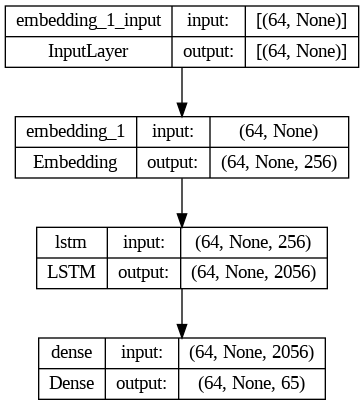

In [24]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [25]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [26]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[ 5.46264090e-03  1.02081557e-03  5.39984554e-04 -3.81795992e-03
  1.86567777e-03  1.72833633e-03  3.46944667e-03 -6.18034042e-04
  4.26930143e-03  3.12647317e-05 -2.04079808e-03 -5.75046102e-03
 -5.42854425e-03  4.04066057e-04  5.82455890e-04  1.65192958e-03
 -3.07369861e-03  2.86419713e-03  4.08463506e-03  2.33508949e-03
 -5.65191614e-04 -4.12581768e-03 -5.22819464e-04  2.96047702e-03
  1.27956900e-03 -1.26134168e-04  4.16828599e-03 -4.94181062e-04
 -5.27747115e-03  4.04818356e-03  7.29740481e-04 -5.62516041e-04
 -6.08372618e-04 -9.41639533e-04  3.54653248e-03  1.83909526e-03
  1.33438886e-03  1.18210993e-03  3.65653716e-04 -1.84647250e-03
  2.53393245e-03  2.16115848e-03 -2.29989667e-03  8.29505152e-05
  1.82464160e-03 -3.40109284e-04  1.13194017e-03 -2.01112637e-03
 -4.35697788e-04 -5.02700044e-04  3.57709290e-03 -2.21775915e-03
  3.02565517e-03 -7.14183133e-03 -5.38948178e-03  4.16679122e-03
 -3.46389762e-03  3.15

In [27]:
tmp_logits = [
  [-0.95, 0, 0.95],
];

tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)

print(tmp_samples)


tf.Tensor([[2 1 2 0 1]], shape=(1, 5), dtype=int64)


In [28]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([100, 1])

In [29]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(100,)

In [30]:
sampled_indices

array([28, 40, 52,  2, 25,  9, 48, 26, 23, 26, 12, 23, 21,  6, 61, 45, 35,
       64,  6, 61, 43, 58, 38, 54, 45,  7, 20, 42, 36, 33,  8,  3,  8,  2,
       47, 28, 23, 14, 13,  6, 20, 51, 26, 52, 33, 49, 12, 10, 31, 57, 19,
        1, 31, 41, 55, 22, 12, 11, 47,  6,  2, 45, 24, 48, 47, 54,  2, 30,
        5, 53, 31, 28,  9, 41, 28, 43, 58, 53, 33, 50, 51, 52, 11, 59, 19,
        7, 45, 46,  4, 51, 51, 39, 49, 44,  4, 52, 32, 10, 46, 18])

In [31]:
print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
print()
print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

Input:
 'vish-fond in great designs.\n\nQUEEN ELIZABETH:\nShall I be tempted of the devil thus?\n\nKING RICHARD II'

Next char prediction:
 "Pbn!M3jNKN?KI,wgWz,wetZpg-HdXU.$.!iPKBA,HmNnUk?:SsG ScqJ?;i,!gLjip!R'oSP3cPetoUlmn;uG-gh&mmakf&nT:hF"


In [32]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

Prediction  0
  input: 60 ('v')
  next predicted: 1 ('P')
Prediction  1
  input: 47 ('i')
  next predicted: 1 ('b')
Prediction  2
  input: 57 ('s')
  next predicted: 1 ('n')
Prediction  3
  input: 46 ('h')
  next predicted: 1 ('!')
Prediction  4
  input: 7 ('-')
  next predicted: 1 ('M')


In [33]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.1732054


In [34]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [35]:
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [36]:
EPOCHS=40
history = model.fit(
  x=dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/40
172/172 [==============================] - 50s 256ms/step - loss: 2.6971
Epoch 2/40
172/172 [==============================] - 49s 275ms/step - loss: 1.9331
Epoch 3/40
172/172 [==============================] - 48s 267ms/step - loss: 1.6561
Epoch 4/40
172/172 [==============================] - 50s 274ms/step - loss: 1.5038
Epoch 5/40
172/172 [==============================] - 49s 271ms/step - loss: 1.4107
Epoch 6/40
172/172 [==============================] - 49s 272ms/step - loss: 1.3460
Epoch 7/40
172/172 [==============================] - 49s 276ms/step - loss: 1.2922
Epoch 8/40
172/172 [==============================] - 49s 271ms/step - loss: 1.2427
Epoch 9/40
172/172 [==============================] - 50s 277ms/step - loss: 1.1919
Epoch 10/40
172/172 [==============================] - 48s 267ms/step - loss: 1.1376
Epoch 11/40
172/172 [==============================] - 49s 276ms/step - loss: 1.0784
Epoch 12/40
172/172 [==============================] - 50s 276ms/step - lo

In [37]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

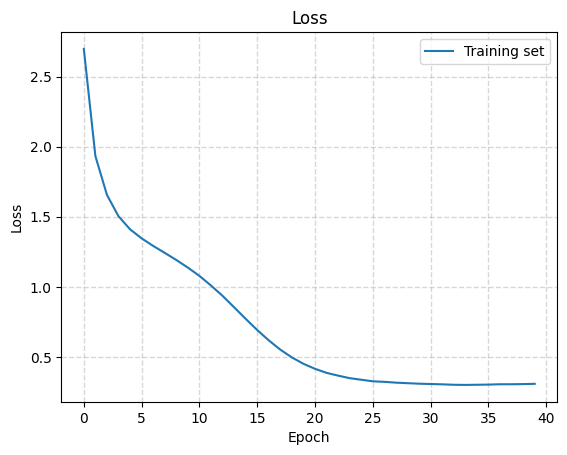

In [38]:
render_training_history(history)

In [39]:
tf.train.latest_checkpoint(checkpoint_dir)


'tmp/checkpoints/ckpt_40'

In [40]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [41]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (1, None, 256)            16640     
                                                                 
 lstm_1 (LSTM)               (1, None, 2056)           19022112  
                                                                 
 dense_1 (Dense)             (1, None, 65)             133705    
                                                                 
Total params: 19,172,457
Trainable params: 19,172,457
Non-trainable params: 0
_________________________________________________________________


In [42]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):

    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    text_generated = []

    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()


        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [43]:
print(generate_text(model, start_string=u"ROMEO: "))


ROMEO: I could with mothers: I wonder what I lost

GREMIO:
What! I have not been called so of maids away;
Treasons may yet undor state.

BUCKINGHAM:
What think you, majesty? it was thy gracious regreeting persh
Than he will scope to swear, as in this hour,
You make me at the feast. Mercitizens hardly ent.

CAPULET:
Death's pale peace?

ROMEO:
Of Mantua, taste forswearing as my weeping souls
And watch you for your news and yet not go;
Yet 'tis the reach of thee till I air
And tells us what I bid the glory,
That makes us ripe let so meet and die.

FRIAR LAURENCE:
Thou shalt be free
As mountain wind she bid my stay lie there; at all the line
Of our will-hot saying, sir, 'tis a mast.

RICHMOND:
Good excast I further have to take King Richard and myself shall power
To the pleech within, does not the south might lay the old
man and his summer beauty to the deceit from receiving
As the strong link deall out with the dug!
Shake quoth I prospect with him, Hengeasted as changed complaints.

HENR

In [44]:
print(generate_text(model, start_string=u"ROMEO: ", temperature=1.5))


ROMEO: it were as good
To prove it, and if you seek occasion of offence?
Terms sinks on the heaven and deg bastard and
To be ing like me back again: face, wife:
Now. Montague, or moth both these year since,
Thy breath of chanaker them sithatine, her widow.
Is't possible the Eemner.

BRUTUS:
In that there's charity, being assured,
Hen vait wit seeks? Come, Claudio, dealing?

NORTHUMBERLAND:
NREY:
Strong myster hunger s not?

Servant;
And I thinDY VI

SEBASTIAN:
Why, Farewell.

BIONDELLO:
Why in this rude aside?

ISABELLA:
Can there been,
Let not to-morrow to the newer title of that: along Edward,
Her vial remishouse reasons,
More worrerful iratory compliment;
ELE:
Thy child, by Jesumperer.

KING RICHARD III:
O blessed, blessed batt!
Hatt quen'st me patience to ese grace and grows the crown,
Which waste of it will Noeforce pie ut Mowbray their feasure.

KING Romeowithstrat s charmenQUEEN ELIZABETH:
You g which you accuse the s Nutland's mine,
Dulling ANTIS:
If King Lord Northumberland, h

In [45]:
model_name = '/content/drive/MyDrive/text_generation_shakespeare_rnn.h5'
model.save(model_name, save_format='h5')